<a href="https://colab.research.google.com/github/ShoroukGamal/machine-learning-projects/blob/main/supervised/LinearRegression/car_data_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Car_Purchasing_Data.csv')

In [ ]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [ ]:
len(df[df.duplicated()])

0

In [ ]:
df.drop(["Customer Name", "Customer e-mail", "Country"], axis=1, inplace=True)

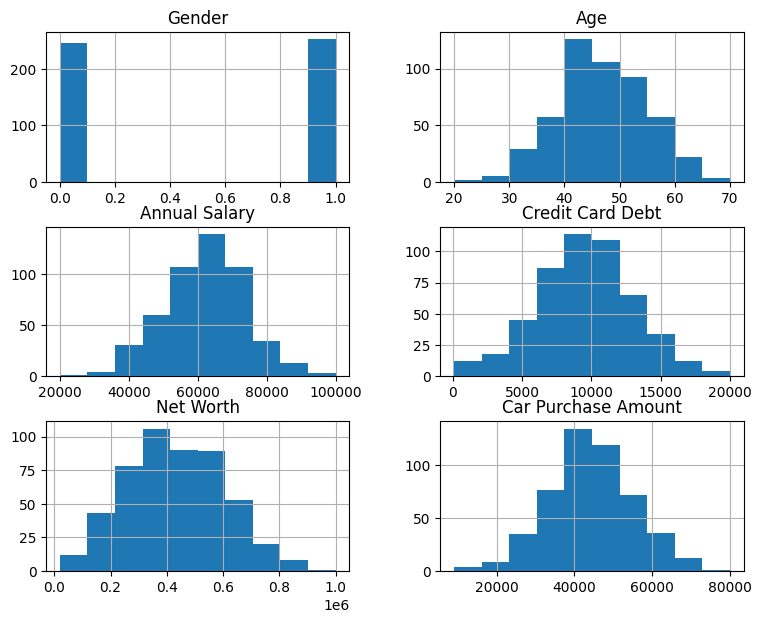

In [ ]:
df.hist(figsize=(9 , 7))

#plt.title("car model")
plt.show()

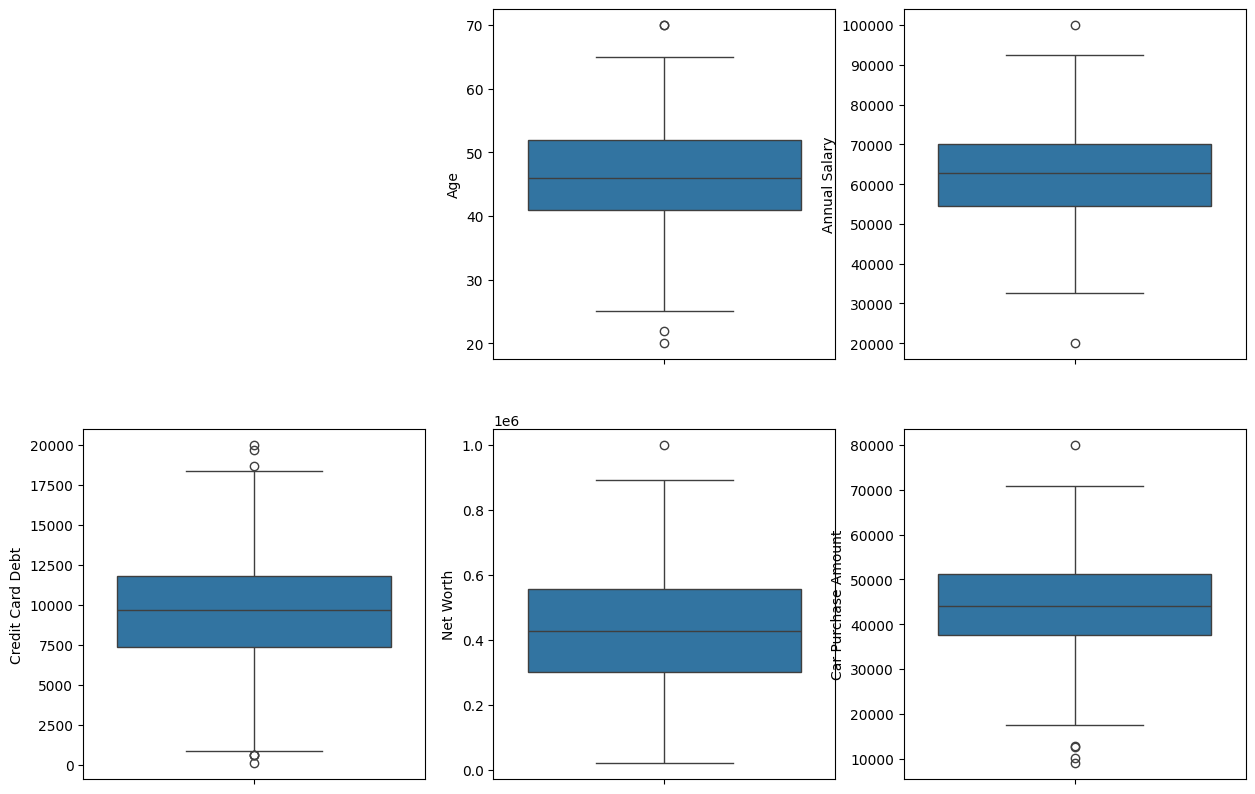

In [ ]:
plt.figure(figsize=(15, 10))

#plt.subplot(2,3,1)
#sns.boxplot(df["Gender"])

plt.subplot(2,3,2)
sns.boxplot(df["Age"])

plt.subplot(2,3,3)
sns.boxplot(df["Annual Salary"])

plt.subplot(2,3,4)
sns.boxplot(df["Credit Card Debt"])

plt.subplot(2,3,5)
sns.boxplot(df["Net Worth"])

plt.subplot(2,3,6)
sns.boxplot(df["Car Purchase Amount"])

plt.show()

In [ ]:
df_new = df[(df["Age"] < 65) & (df["Age"] > 30)]
df_new = df_new[(df_new["Annual Salary"] < 100000) & (df_new["Annual Salary"] > 40000)]
df_new = df_new[(df_new["Credit Card Debt"] < 17500) & (df_new["Credit Card Debt"] > 1000)]
df_new = df_new[df_new["Net Worth"] < 0.8*10**6]
df_new = df_new[(df_new["Car Purchase Amount"] < 70000) & (df_new["Car Purchase Amount"] > 20000)]
df_new.shape

(447, 6)

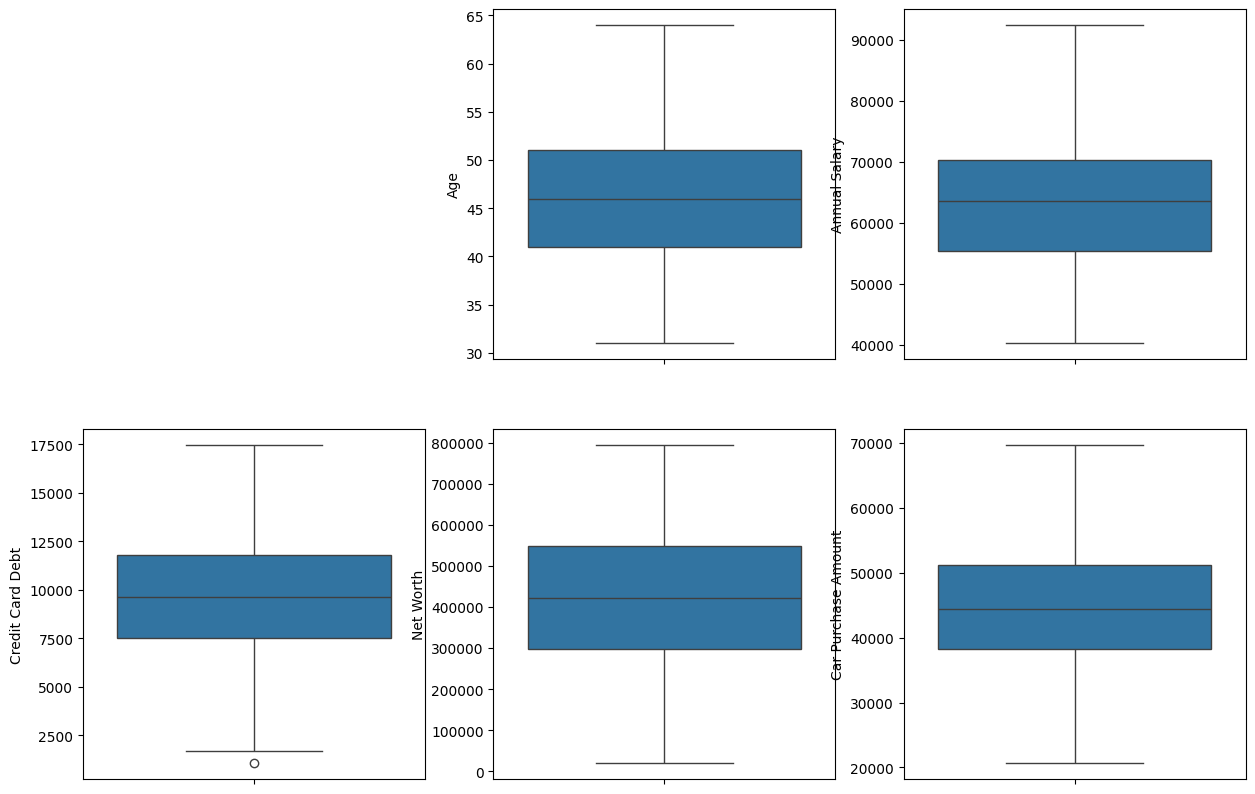

In [ ]:
plt.figure(figsize=(15, 10))

#plt.subplot(2,3,1)
#sns.boxplot(df["Gender"])

plt.subplot(2,3,2)
sns.boxplot(df_new["Age"])

plt.subplot(2,3,3)
sns.boxplot(df_new["Annual Salary"])

plt.subplot(2,3,4)
sns.boxplot(df_new["Credit Card Debt"])

plt.subplot(2,3,5)
sns.boxplot(df_new["Net Worth"])

plt.subplot(2,3,6)
sns.boxplot(df_new["Car Purchase Amount"])

plt.show()

In [ ]:
from io import DEFAULT_BUFFER_SIZE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_new)

In [ ]:
df_scaled.min(), df_scaled.max()

(0.0, 1.0)

In [ ]:
x = df_scaled[:, :-1]
y = df_scaled[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (357, 5)  y_train =  (357,)
X_test  =  (90, 5)  y_test  =  (90,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE = ", mse)
print("MAE = ", mae)
print("R2 = ", r2)

MSE =  2.4445785751506792e-05
MAE =  0.0043760805650287305
R2 =  0.9993010350754188


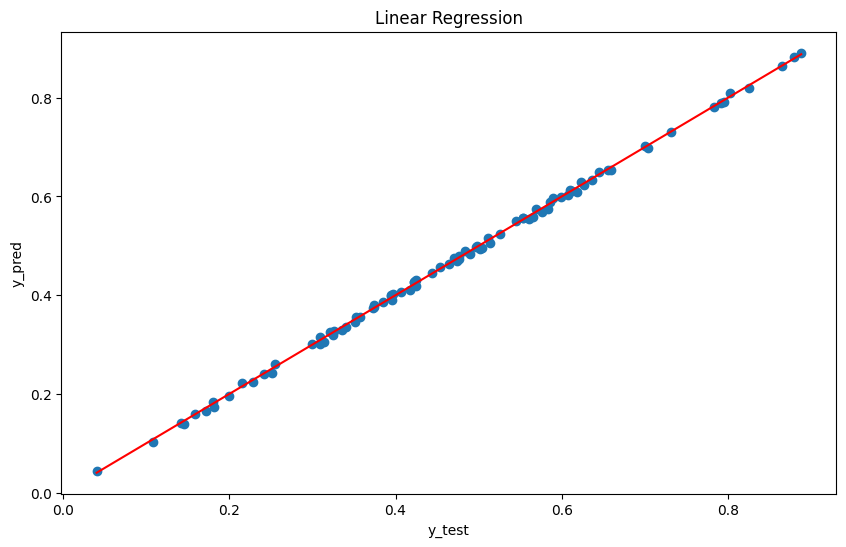

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color="red")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Linear Regression")
plt.show()